In [6]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

#Pre-processing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

#Plots and graphs
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

In [7]:
df_tobacco_2018 = pd.read_csv("Tobacco_2018.csv",header=0,parse_dates=[0])

In [8]:
df_tobacco_2019 = pd.read_csv("Tobacco_2019.csv",header=0,parse_dates=[0])

In [9]:
df_tobacco_2020 = pd.read_csv("Tobacco_2020.csv",header=0,parse_dates=[0])

In [11]:
df_tobacco_2021 = pd.read_csv("Tobacco_2021.csv",header=0,parse_dates=[0])

In [12]:
df_tobacco_2018

,Arrival_Date,State,Variety,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price
0,2018-06-01,Chattisgarh,Other,8000,8000,8000
1,2018-01-17,Chattisgarh,Other,8000,8000,8000
2,2018-01-19,Chattisgarh,Other,8000,8000,8000
3,2018-01-22,Chattisgarh,Other,8000,8000,8000
4,2018-01-29,Chattisgarh,Other,8000,8000,8000
...,...,...,...,...,...,...
1676,2018-12-29,Uttar Pradesh,Other,3000,3300,3250
1677,2018-12-01,Uttar Pradesh,Other,1900,2100,2000
1678,2018-01-15,Uttar Pradesh,Other,1900,2100,2000
1679,2018-03-28,Uttar Pradesh,Other,2000,2500,2200


In [17]:
df_final = pd.DataFrame()

In [18]:
df_final1

""


In [19]:
#df_final.to_csv("C:\\Users\\Admin\\Desktop\\Raj Summary Project\\TimeSeriesTobacco\\All_Year_tobacco.csv")

In [20]:
df_tobacco = pd.read_csv("All_Year_tobacco.csv",header=0,parse_dates=[0])

In [21]:
df_tobacco.describe()

,Max_x0020_Price,Modal_x0020_Price
count,15344.000000,15344.000000
mean,4452.506908,4360.482687
std,3342.046222,3274.086592
min,0.000000,0.000000
25%,2100.000000,2100.000000
50%,3500.000000,3750.000000
75%,6000.000000,5500.000000
max,40004.000000,40000.000000


In [23]:
df_tobacco

,Arrival_Date,State,Variety,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price
0,2010-05-19,Andhra Pradesh,Other,180,220,200.0
1,2010-05-20,Andhra Pradesh,Other,180,220,200.0
2,2010-08-19,Chattisgarh,Other,1500,1500,1500.0
3,2010-10-11,Chattisgarh,Other,2400,2400,2400.0
4,2010-12-22,Chattisgarh,Other,2400,2400,2400.0
...,...,...,...,...,...,...
15339,2021-05-28,Uttar Pradesh,Chewing,8350,8600,8450.0
15340,2021-04-06,Uttar Pradesh,Chewing,4100,4300,4200.0
15341,2021-11-06,Uttar Pradesh,Chewing,4000,4200,4100.0
15342,2021-08-04,West Bengal,Other,500,600,550.0


#Feature Eng

In [24]:
feature = df_tobacco.copy(deep=True)

In [25]:
feature["lag1_Modal"] = feature["Modal_x0020_Price"].shift(1) 

In [26]:
feature

,Arrival_Date,State,Variety,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price,lag1_Modal
0,2010-05-19,Andhra Pradesh,Other,180,220,200.0,NaN
1,2010-05-20,Andhra Pradesh,Other,180,220,200.0,200.0
2,2010-08-19,Chattisgarh,Other,1500,1500,1500.0,200.0
3,2010-10-11,Chattisgarh,Other,2400,2400,2400.0,1500.0
4,2010-12-22,Chattisgarh,Other,2400,2400,2400.0,2400.0
...,...,...,...,...,...,...,...
15339,2021-05-28,Uttar Pradesh,Chewing,8350,8600,8450.0,8850.0
15340,2021-04-06,Uttar Pradesh,Chewing,4100,4300,4200.0,8450.0
15341,2021-11-06,Uttar Pradesh,Chewing,4000,4200,4100.0,4200.0
15342,2021-08-04,West Bengal,Other,500,600,550.0,4100.0


In [27]:
feature["roll_mean"] = df_tobacco["Modal_x0020_Price"].rolling(window = 2).mean()

In [28]:
feature

,Arrival_Date,State,Variety,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price,lag1_Modal,roll_mean
0,2010-05-19,Andhra Pradesh,Other,180,220,200.0,NaN,NaN
1,2010-05-20,Andhra Pradesh,Other,180,220,200.0,200.0,200.0
2,2010-08-19,Chattisgarh,Other,1500,1500,1500.0,200.0,850.0
3,2010-10-11,Chattisgarh,Other,2400,2400,2400.0,1500.0,1950.0
4,2010-12-22,Chattisgarh,Other,2400,2400,2400.0,2400.0,2400.0
...,...,...,...,...,...,...,...,...
15339,2021-05-28,Uttar Pradesh,Chewing,8350,8600,8450.0,8850.0,8650.0
15340,2021-04-06,Uttar Pradesh,Chewing,4100,4300,4200.0,8450.0,6325.0
15341,2021-11-06,Uttar Pradesh,Chewing,4000,4200,4100.0,4200.0,4150.0
15342,2021-08-04,West Bengal,Other,500,600,550.0,4100.0,2325.0


In [29]:
feature["Expand_max"] = df_tobacco['Modal_x0020_Price'].expanding().max()

In [30]:
feature

,Arrival_Date,State,Variety,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price,lag1_Modal,roll_mean,Expand_max
0,2010-05-19,Andhra Pradesh,Other,180,220,200.0,NaN,NaN,200.0
1,2010-05-20,Andhra Pradesh,Other,180,220,200.0,200.0,200.0,200.0
2,2010-08-19,Chattisgarh,Other,1500,1500,1500.0,200.0,850.0,1500.0
3,2010-10-11,Chattisgarh,Other,2400,2400,2400.0,1500.0,1950.0,2400.0
4,2010-12-22,Chattisgarh,Other,2400,2400,2400.0,2400.0,2400.0,2400.0
...,...,...,...,...,...,...,...,...,...
15339,2021-05-28,Uttar Pradesh,Chewing,8350,8600,8450.0,8850.0,8650.0,40000.0
15340,2021-04-06,Uttar Pradesh,Chewing,4100,4300,4200.0,8450.0,6325.0,40000.0
15341,2021-11-06,Uttar Pradesh,Chewing,4000,4200,4100.0,4200.0,4150.0,40000.0
15342,2021-08-04,West Bengal,Other,500,600,550.0,4100.0,2325.0,40000.0


In [31]:
df_sampling = df_tobacco.copy(deep=True)

In [32]:
df_sampling = df_tobacco.resample("Q",on="Arrival_Date").mean()

In [33]:
df_sampling

,Max_x0020_Price,Modal_x0020_Price
Arrival_Date,,
2010-03-31,5120.486111,5642.067130
2010-06-30,4613.503436,4322.003436
2010-09-30,3680.629454,3548.412114
2010-12-31,2982.567720,2733.959368
2011-03-31,3263.049051,3440.587025
2011-06-30,3879.441541,3763.202201
2011-09-30,3954.943218,3748.238170
2011-12-31,4250.509091,4256.809917
2012-03-31,6149.065543,6368.146067


In [34]:
df_sampling = df_tobacco.resample('D',on='Arrival_Date').mean()
df_sampling.head(35)

,Max_x0020_Price,Modal_x0020_Price
Arrival_Date,,
2010-01-01,5198.000000,4726.000000
2010-01-02,6150.000000,5843.750000
2010-01-03,4290.000000,6225.000000
2010-01-04,3032.500000,3797.916667
2010-01-05,3335.555556,3040.555556
2010-01-06,3460.333333,4027.000000
2010-01-07,3340.909091,4186.363636
2010-01-08,3670.000000,4525.000000
2010-01-09,4166.666667,5954.166667


In [35]:
interpolated_tobacco = df_tobacco.interpolate(method='linear')

<AxesSubplot:>

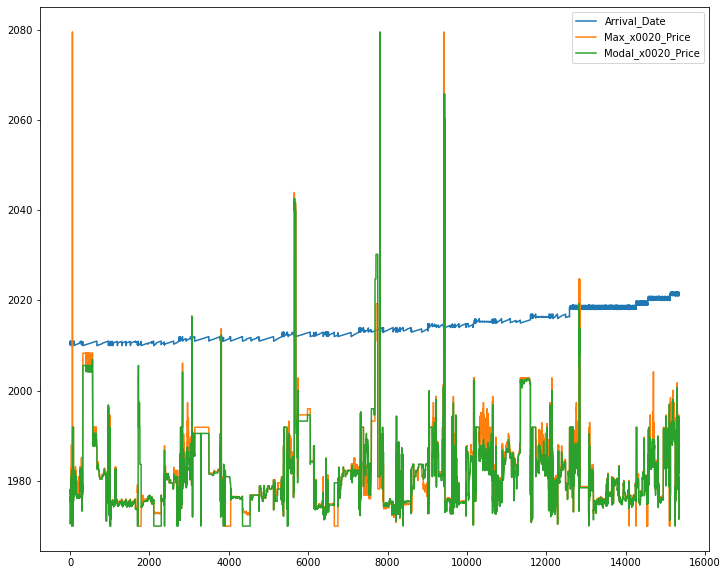

In [36]:
interpolated_tobacco.plot(figsize=(12,10))

In [37]:
ploy_interpolated = df_tobacco.interpolate(method='spline',order=2)

<AxesSubplot:>

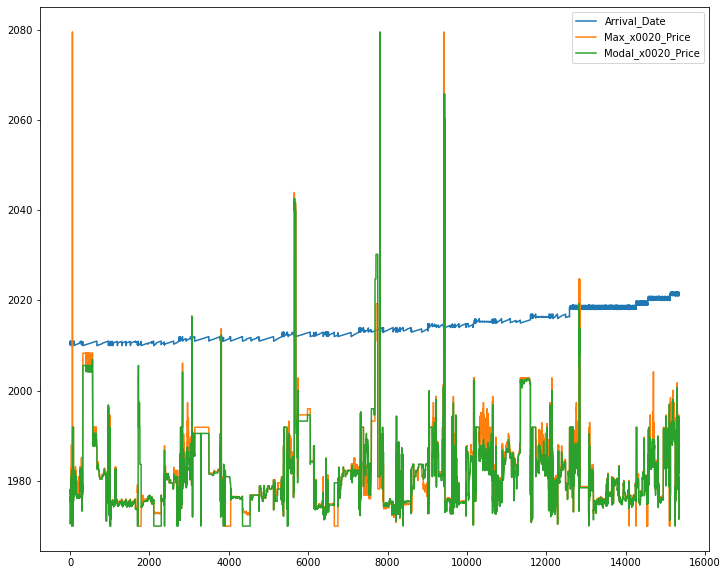

In [38]:
ploy_interpolated.plot(figsize=(12,10))

In [39]:
data_viz = df_tobacco.copy(deep=True)

In [40]:
data_viz.head()

,Arrival_Date,State,Variety,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price
0,2010-05-19,Andhra Pradesh,Other,180,220,200.0
1,2010-05-20,Andhra Pradesh,Other,180,220,200.0
2,2010-08-19,Chattisgarh,Other,1500,1500,1500.0
3,2010-10-11,Chattisgarh,Other,2400,2400,2400.0
4,2010-12-22,Chattisgarh,Other,2400,2400,2400.0


In [41]:
data_viz.tail()

,Arrival_Date,State,Variety,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price
15339,2021-05-28,Uttar Pradesh,Chewing,8350,8600,8450.0
15340,2021-04-06,Uttar Pradesh,Chewing,4100,4300,4200.0
15341,2021-11-06,Uttar Pradesh,Chewing,4000,4200,4100.0
15342,2021-08-04,West Bengal,Other,500,600,550.0
15343,2021-02-05,West Bengal,Other,3800,4000,3900.0


<AxesSubplot:>

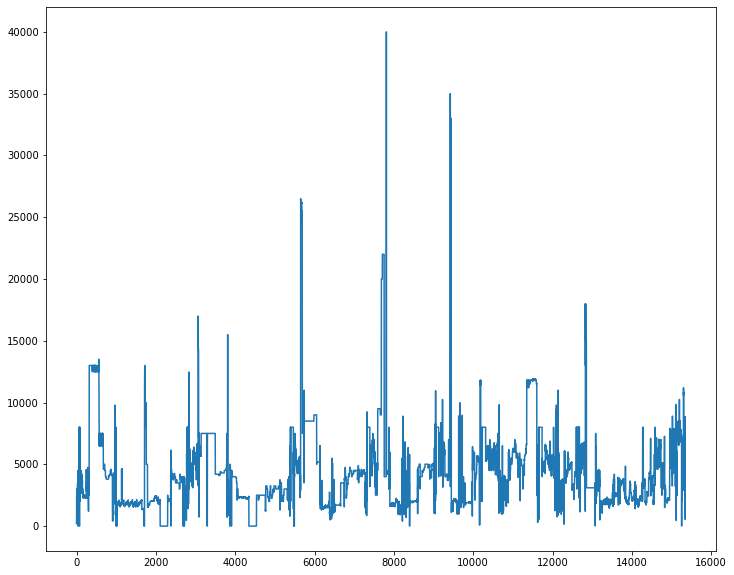

In [42]:
data_viz["Modal_x0020_Price"].plot(figsize=(12,10))

In [43]:
data_viz.index = data_viz["Arrival_Date"]

<AxesSubplot:xlabel='Arrival_Date'>

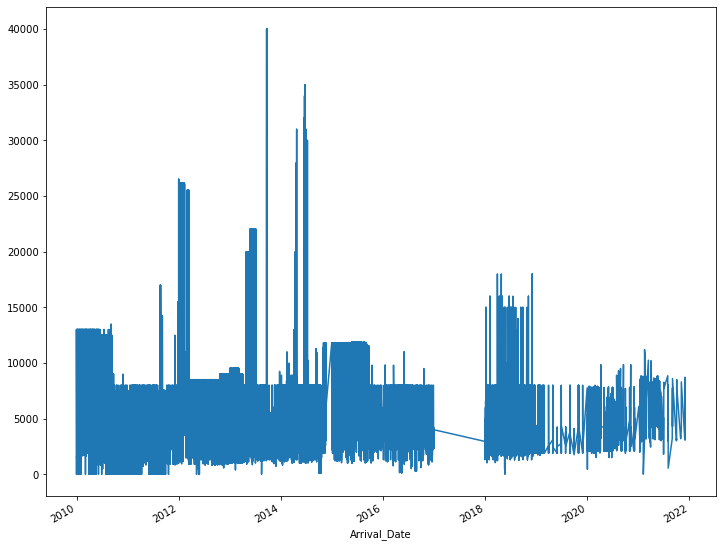

In [44]:
data_viz["Modal_x0020_Price"].plot(figsize=(12,10))

In [45]:
Dataviz_df2 = df_tobacco.copy(deep=True)

In [46]:
Dataviz_df2 = Dataviz_df2[(Dataviz_df2['Arrival_Date'] > '2016-01-01') & (Dataviz_df2['Arrival_Date'] < '2021-12-31')]

<AxesSubplot:>

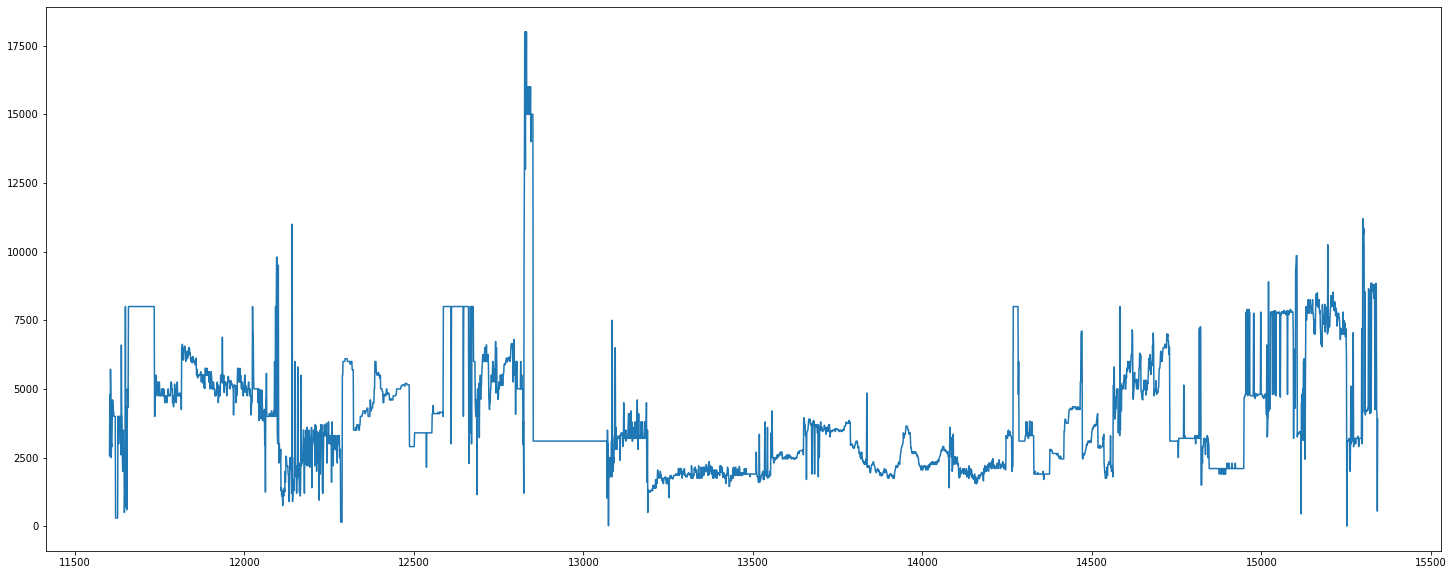

In [47]:
Dataviz_df2["Modal_x0020_Price"].plot(figsize=(25,10))

<AxesSubplot:ylabel='Modal_x0020_Price'>

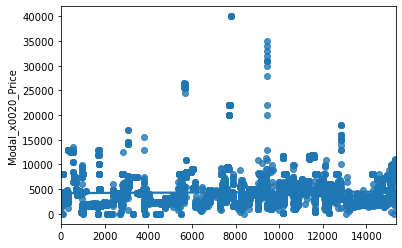

In [48]:
sns.regplot(x=df_tobacco.index.values,y=df_tobacco['Modal_x0020_Price'],order=1)

<AxesSubplot:ylabel='Modal_x0020_Price'>

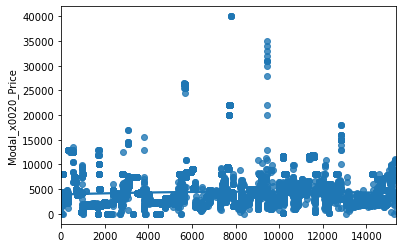

In [49]:
sns.regplot(x=df_tobacco.index.values,y=df_tobacco['Modal_x0020_Price'],order=2)

<AxesSubplot:ylabel='Modal_x0020_Price'>

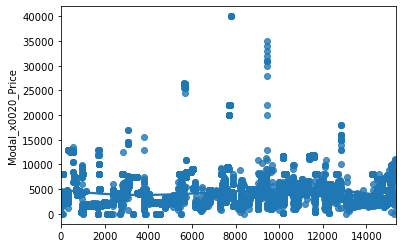

In [50]:
sns.regplot(x=df_tobacco.index.values,y=df_tobacco['Modal_x0020_Price'],order=3)

In [51]:
df_remove_seasona = df_tobacco.copy(deep=True)

In [52]:
df_remove_seasona["Year"] = df_remove_seasona["Arrival_Date"].dt.year

In [53]:
df_remove_seasona.groupby('Year')["Modal_x0020_Price"].mean()

Year
2010    3779.296134
2011    3796.016936
2012    4949.477970
2013    4696.940401
2014    4325.572774
2015    6318.426044
2016    4546.279188
2018    3274.956573
2019    3284.976271
2020    4556.942342
2021    6382.084071
Name: Modal_x0020_Price, dtype: float64

<AxesSubplot:xlabel='Year'>

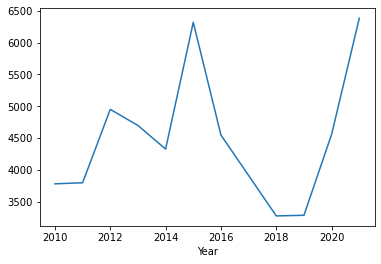

In [54]:
df_remove_seasona.groupby('Year')['Modal_x0020_Price'].mean().plot()

In [55]:
lag_plots = df_tobacco.copy(deep=True)

In [56]:
lag_plots["lag1_Modal"] = df_tobacco["Modal_x0020_Price"].shift(1)

In [57]:
lag_plots["lag2_Modal"] = df_tobacco["Modal_x0020_Price"].shift(2)

In [58]:
lag_plots

,Arrival_Date,State,Variety,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price,lag1_Modal,lag2_Modal
0,2010-05-19,Andhra Pradesh,Other,180,220,200.0,NaN,NaN
1,2010-05-20,Andhra Pradesh,Other,180,220,200.0,200.0,NaN
2,2010-08-19,Chattisgarh,Other,1500,1500,1500.0,200.0,200.0
3,2010-10-11,Chattisgarh,Other,2400,2400,2400.0,1500.0,200.0
4,2010-12-22,Chattisgarh,Other,2400,2400,2400.0,2400.0,1500.0
...,...,...,...,...,...,...,...,...
15339,2021-05-28,Uttar Pradesh,Chewing,8350,8600,8450.0,8850.0,8800.0
15340,2021-04-06,Uttar Pradesh,Chewing,4100,4300,4200.0,8450.0,8850.0
15341,2021-11-06,Uttar Pradesh,Chewing,4000,4200,4100.0,4200.0,8450.0
15342,2021-08-04,West Bengal,Other,500,600,550.0,4100.0,4200.0


<AxesSubplot:xlabel='lag1_Modal', ylabel='Modal_x0020_Price'>

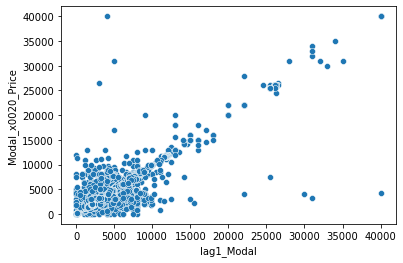

In [59]:
sns.scatterplot(x=lag_plots['lag1_Modal'],y=lag_plots['Modal_x0020_Price'])

<AxesSubplot:xlabel='lag2_Modal', ylabel='Modal_x0020_Price'>

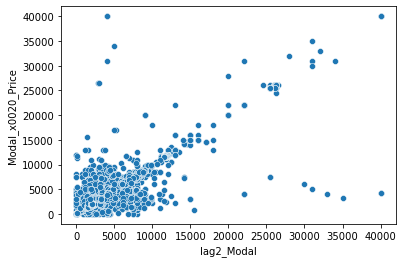

In [60]:
sns.scatterplot(x=lag_plots['lag2_Modal'],y=lag_plots['Modal_x0020_Price'])

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

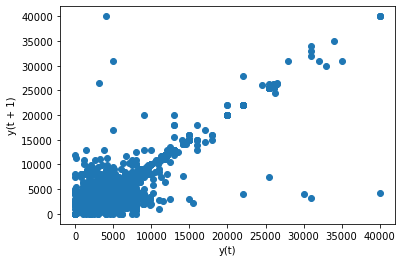

In [61]:
lag_plot(df_tobacco['Modal_x0020_Price'])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

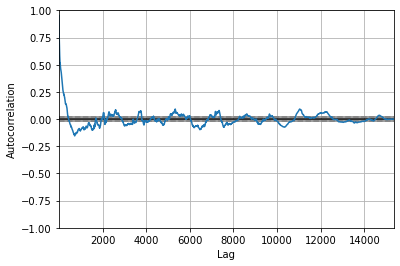

In [62]:
autocorrelation_plot(df_tobacco['Modal_x0020_Price'])

In [63]:
Dataviz_df3 = df_tobacco[(df_tobacco['Arrival_Date'] > '2010-01-01') & (df_tobacco['Arrival_Date'] < '2021-12-31')]

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

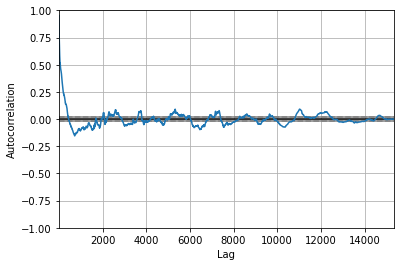

In [64]:
autocorrelation_plot(Dataviz_df3['Modal_x0020_Price'])

In [65]:
df_decomposing = df_tobacco.copy(deep=True)

In [66]:
df_decomposing

,Arrival_Date,State,Variety,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price
0,2010-05-19,Andhra Pradesh,Other,180,220,200.0
1,2010-05-20,Andhra Pradesh,Other,180,220,200.0
2,2010-08-19,Chattisgarh,Other,1500,1500,1500.0
3,2010-10-11,Chattisgarh,Other,2400,2400,2400.0
4,2010-12-22,Chattisgarh,Other,2400,2400,2400.0
...,...,...,...,...,...,...
15339,2021-05-28,Uttar Pradesh,Chewing,8350,8600,8450.0
15340,2021-04-06,Uttar Pradesh,Chewing,4100,4300,4200.0
15341,2021-11-06,Uttar Pradesh,Chewing,4000,4200,4100.0
15342,2021-08-04,West Bengal,Other,500,600,550.0


In [67]:
df_decomposing.index = df_decomposing["Arrival_Date"]

In [68]:
df_decomposing

,Arrival_Date,State,Variety,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price
Arrival_Date,,,,,,
2010-05-19,2010-05-19,Andhra Pradesh,Other,180,220,200.0
2010-05-20,2010-05-20,Andhra Pradesh,Other,180,220,200.0
2010-08-19,2010-08-19,Chattisgarh,Other,1500,1500,1500.0
2010-10-11,2010-10-11,Chattisgarh,Other,2400,2400,2400.0
2010-12-22,2010-12-22,Chattisgarh,Other,2400,2400,2400.0
...,...,...,...,...,...,...
2021-05-28,2021-05-28,Uttar Pradesh,Chewing,8350,8600,8450.0
2021-04-06,2021-04-06,Uttar Pradesh,Chewing,4100,4300,4200.0
2021-11-06,2021-11-06,Uttar Pradesh,Chewing,4000,4200,4100.0


In [69]:
result = seasonal_decompose(df_decomposing["Modal_x0020_Price"],model="additive",period=168)

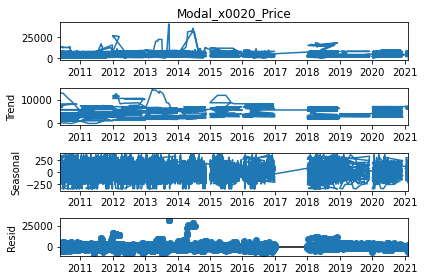

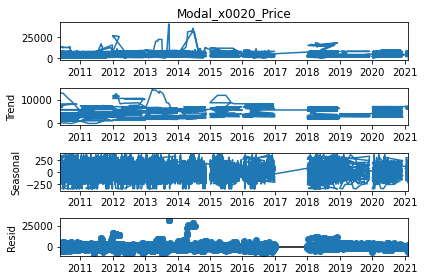

In [70]:
result.plot()

In [71]:
df_differencing = df_tobacco.copy(deep=True)

In [72]:
df_differencing.head()

,Arrival_Date,State,Variety,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price
0,2010-05-19,Andhra Pradesh,Other,180,220,200.0
1,2010-05-20,Andhra Pradesh,Other,180,220,200.0
2,2010-08-19,Chattisgarh,Other,1500,1500,1500.0
3,2010-10-11,Chattisgarh,Other,2400,2400,2400.0
4,2010-12-22,Chattisgarh,Other,2400,2400,2400.0


In [73]:
df_differencing["lag1"] = df_differencing["Modal_x0020_Price"].shift(1)

In [74]:
df_differencing

,Arrival_Date,State,Variety,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price,lag1
0,2010-05-19,Andhra Pradesh,Other,180,220,200.0,NaN
1,2010-05-20,Andhra Pradesh,Other,180,220,200.0,200.0
2,2010-08-19,Chattisgarh,Other,1500,1500,1500.0,200.0
3,2010-10-11,Chattisgarh,Other,2400,2400,2400.0,1500.0
4,2010-12-22,Chattisgarh,Other,2400,2400,2400.0,2400.0
...,...,...,...,...,...,...,...
15339,2021-05-28,Uttar Pradesh,Chewing,8350,8600,8450.0,8850.0
15340,2021-04-06,Uttar Pradesh,Chewing,4100,4300,4200.0,8450.0
15341,2021-11-06,Uttar Pradesh,Chewing,4000,4200,4100.0,4200.0
15342,2021-08-04,West Bengal,Other,500,600,550.0,4100.0


In [75]:
df_differencing["MODAL_DIFF_1"] = df_differencing["Modal_x0020_Price"] - df_differencing["lag1"] 

In [76]:
df_differencing

,Arrival_Date,State,Variety,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price,lag1,MODAL_DIFF_1
0,2010-05-19,Andhra Pradesh,Other,180,220,200.0,NaN,NaN
1,2010-05-20,Andhra Pradesh,Other,180,220,200.0,200.0,0.0
2,2010-08-19,Chattisgarh,Other,1500,1500,1500.0,200.0,1300.0
3,2010-10-11,Chattisgarh,Other,2400,2400,2400.0,1500.0,900.0
4,2010-12-22,Chattisgarh,Other,2400,2400,2400.0,2400.0,0.0
...,...,...,...,...,...,...,...,...
15339,2021-05-28,Uttar Pradesh,Chewing,8350,8600,8450.0,8850.0,-400.0
15340,2021-04-06,Uttar Pradesh,Chewing,4100,4300,4200.0,8450.0,-4250.0
15341,2021-11-06,Uttar Pradesh,Chewing,4000,4200,4100.0,4200.0,-100.0
15342,2021-08-04,West Bengal,Other,500,600,550.0,4100.0,-3550.0


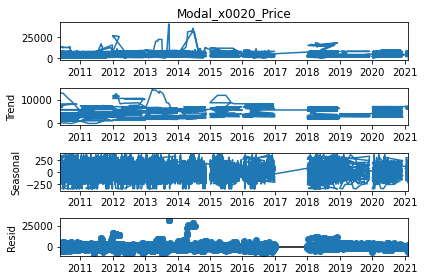

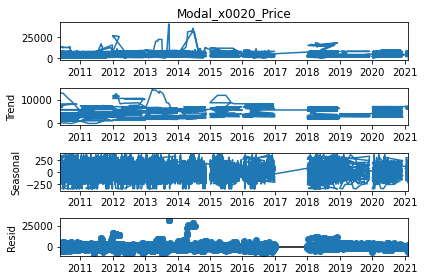

In [77]:
df_differencing.index = df_tobacco["Arrival_Date"]
result_a = seasonal_decompose(df_differencing['Modal_x0020_Price'],model='additive',period=168)
result_a.plot()

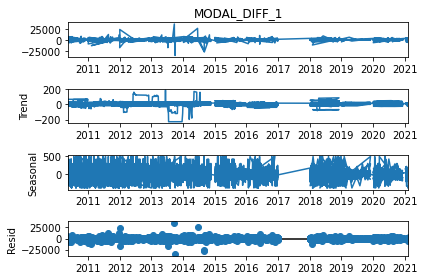

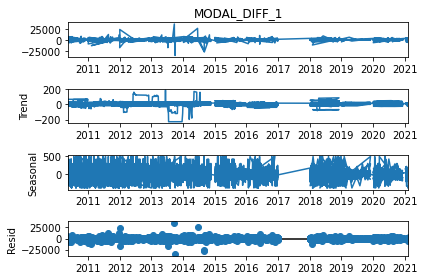

In [78]:
result_b = seasonal_decompose(df_differencing.iloc[1:,7],model='additive',period=168)
result_b.plot()

<AxesSubplot:xlabel='Arrival_Date'>

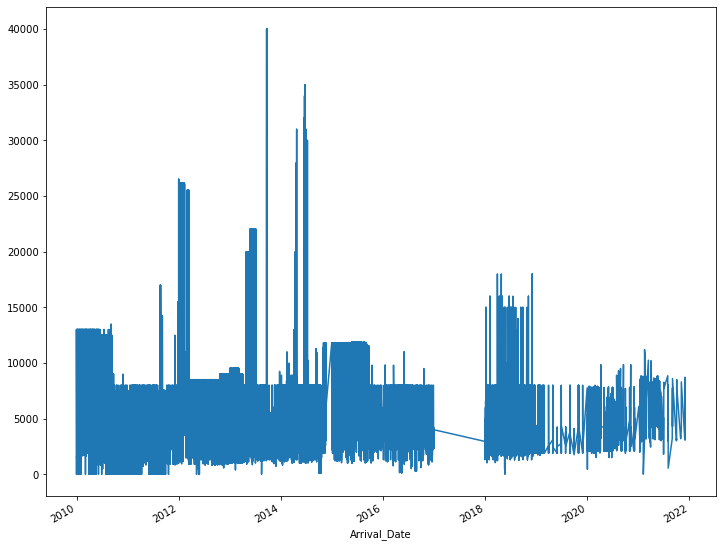

In [79]:
df_differencing["Modal_x0020_Price"].plot(figsize=(12,10))

In [80]:
df_differencing["MODAL_DIFF_12"] = df_differencing["MODAL_DIFF_1"].shift(12) 

In [81]:
df_differencing

,Arrival_Date,State,Variety,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price,lag1,MODAL_DIFF_1,MODAL_DIFF_12
Arrival_Date,,,,,,,,,
2010-05-19,2010-05-19,Andhra Pradesh,Other,180,220,200.0,NaN,NaN,NaN
2010-05-20,2010-05-20,Andhra Pradesh,Other,180,220,200.0,200.0,0.0,NaN
2010-08-19,2010-08-19,Chattisgarh,Other,1500,1500,1500.0,200.0,1300.0,NaN
2010-10-11,2010-10-11,Chattisgarh,Other,2400,2400,2400.0,1500.0,900.0,NaN
2010-12-22,2010-12-22,Chattisgarh,Other,2400,2400,2400.0,2400.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...
2021-05-28,2021-05-28,Uttar Pradesh,Chewing,8350,8600,8450.0,8850.0,-400.0,-150.0
2021-04-06,2021-04-06,Uttar Pradesh,Chewing,4100,4300,4200.0,8450.0,-4250.0,150.0
2021-11-06,2021-11-06,Uttar Pradesh,Chewing,4000,4200,4100.0,4200.0,-100.0,0.0


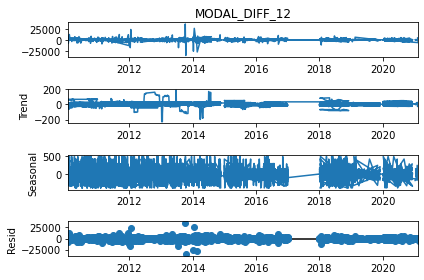

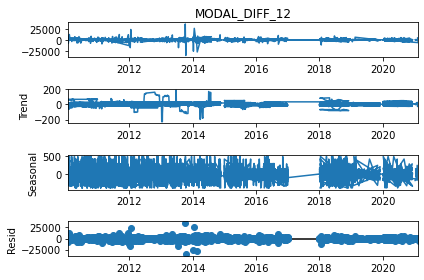

In [82]:
result = seasonal_decompose(df_differencing.iloc[13:,8],model='additive',period=168)
result.plot()

In [83]:
df_train_test = df_tobacco.copy(deep=True)

In [84]:
df_train_test.head()

,Arrival_Date,State,Variety,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price
0,2010-05-19,Andhra Pradesh,Other,180,220,200.0
1,2010-05-20,Andhra Pradesh,Other,180,220,200.0
2,2010-08-19,Chattisgarh,Other,1500,1500,1500.0
3,2010-10-11,Chattisgarh,Other,2400,2400,2400.0
4,2010-12-22,Chattisgarh,Other,2400,2400,2400.0


In [85]:
df_train_test.shape

(15344, 6)

In [86]:
df_train_test.shape[0]

15344

In [87]:
train_size = int(df_train_test.shape[0] * 0.7)

In [88]:
train_size

10740

In [89]:
train = df_train_test[0:train_size]
test = df_train_test[train_size:]

In [90]:
train.shape

(10740, 6)

In [91]:
test.shape

(4604, 6)

In [92]:
df_pr = df_tobacco.copy(deep=True)

In [93]:
df_pr["lag1_MODAL_PRICE"] = df_pr["Modal_x0020_Price"].shift(1)

In [94]:
df_pr.head()

,Arrival_Date,State,Variety,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price,lag1_MODAL_PRICE
0,2010-05-19,Andhra Pradesh,Other,180,220,200.0,NaN
1,2010-05-20,Andhra Pradesh,Other,180,220,200.0,200.0
2,2010-08-19,Chattisgarh,Other,1500,1500,1500.0,200.0
3,2010-10-11,Chattisgarh,Other,2400,2400,2400.0,1500.0
4,2010-12-22,Chattisgarh,Other,2400,2400,2400.0,2400.0


In [95]:
df_pr.tail()

,Arrival_Date,State,Variety,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price,lag1_MODAL_PRICE
15339,2021-05-28,Uttar Pradesh,Chewing,8350,8600,8450.0,8850.0
15340,2021-04-06,Uttar Pradesh,Chewing,4100,4300,4200.0,8450.0
15341,2021-11-06,Uttar Pradesh,Chewing,4000,4200,4100.0,4200.0
15342,2021-08-04,West Bengal,Other,500,600,550.0,4100.0
15343,2021-02-05,West Bengal,Other,3800,4000,3900.0,550.0


In [96]:
train,test = df_pr[1:df_pr.shape[0]-3777],df_pr[df_pr.shape[0]-3777:]

In [97]:
train

,Arrival_Date,State,Variety,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price,lag1_MODAL_PRICE
1,2010-05-20,Andhra Pradesh,Other,180,220,200.0,200.0
2,2010-08-19,Chattisgarh,Other,1500,1500,1500.0,200.0
3,2010-10-11,Chattisgarh,Other,2400,2400,2400.0,1500.0
4,2010-12-22,Chattisgarh,Other,2400,2400,2400.0,2400.0
5,2010-02-13,Chattisgarh,Other,1970,1970,1970.0,2400.0
...,...,...,...,...,...,...,...
11562,2015-08-12,West Bengal,Other,11600,12000,11800.0,11800.0
11563,2015-08-13,West Bengal,Other,11700,11900,11800.0,11800.0
11564,2015-08-14,West Bengal,Other,11700,11900,11800.0,11800.0
11565,2015-08-15,West Bengal,Other,11700,11900,11800.0,11800.0


In [98]:
test

,Arrival_Date,State,Variety,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price,lag1_MODAL_PRICE
11567,2015-08-17,West Bengal,Other,11800,12000,11900.0,11800.0
11568,2015-08-18,West Bengal,Other,11800,12000,11900.0,11900.0
11569,2015-08-19,West Bengal,Other,11800,12000,11900.0,11900.0
11570,2015-08-20,West Bengal,Other,11800,12000,11900.0,11900.0
11571,2015-08-21,West Bengal,Other,11800,12000,11900.0,11900.0
...,...,...,...,...,...,...,...
15339,2021-05-28,Uttar Pradesh,Chewing,8350,8600,8450.0,8850.0
15340,2021-04-06,Uttar Pradesh,Chewing,4100,4300,4200.0,8450.0
15341,2021-11-06,Uttar Pradesh,Chewing,4000,4200,4100.0,4200.0
15342,2021-08-04,West Bengal,Other,500,600,550.0,4100.0


In [99]:
train_x,train_y = train['lag1_MODAL_PRICE'],train['Modal_x0020_Price']
test_x,test_y = test['lag1_MODAL_PRICE'],test['Modal_x0020_Price']

In [100]:
prediction = test_y.copy(deep=True)

In [101]:
print(prediction)
print(test_y)

11567    11900.0
11568    11900.0
11569    11900.0
11570    11900.0
11571    11900.0
          ...   
15339     8450.0
15340     4200.0
15341     4100.0
15342      550.0
15343     3900.0
Name: Modal_x0020_Price, Length: 3777, dtype: float64
11567    11900.0
11568    11900.0
11569    11900.0
11570    11900.0
11571    11900.0
          ...   
15339     8450.0
15340     4200.0
15341     4100.0
15342      550.0
15343     3900.0
Name: Modal_x0020_Price, Length: 3777, dtype: float64


In [102]:
mse = mean_squared_error(test_y,prediction)
mse

0.0

In [103]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [104]:
mape = mean_absolute_percentage_error(test_y,prediction)
mape

0.0

In [105]:
print("Model Accuracy: {:f} %".format((100-mape)))

Model Accuracy: 100.000000 %


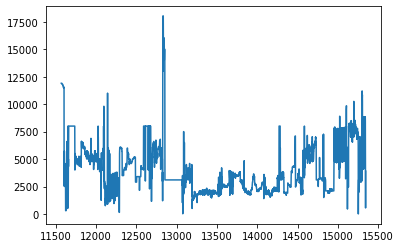

In [106]:
pyplot.plot(test_y)

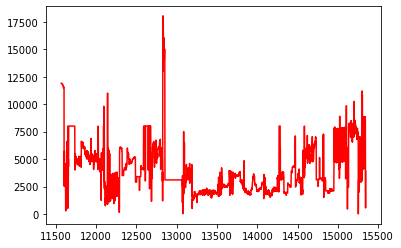

In [107]:
pyplot.plot(prediction,color='red')

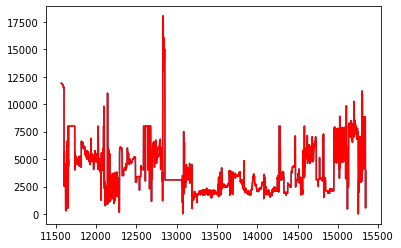

In [108]:
pyplot.plot(test_y)
pyplot.plot(prediction,color='red')

In [109]:
df_ar=df_tobacco.copy(deep=True) 

In [110]:
df_ar

,Arrival_Date,State,Variety,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price
0,2010-05-19,Andhra Pradesh,Other,180,220,200.0
1,2010-05-20,Andhra Pradesh,Other,180,220,200.0
2,2010-08-19,Chattisgarh,Other,1500,1500,1500.0
3,2010-10-11,Chattisgarh,Other,2400,2400,2400.0
4,2010-12-22,Chattisgarh,Other,2400,2400,2400.0
...,...,...,...,...,...,...
15339,2021-05-28,Uttar Pradesh,Chewing,8350,8600,8450.0
15340,2021-04-06,Uttar Pradesh,Chewing,4100,4300,4200.0
15341,2021-11-06,Uttar Pradesh,Chewing,4000,4200,4100.0
15342,2021-08-04,West Bengal,Other,500,600,550.0


In [111]:
train,test = df_pr.Modal_x0020_Price[1:df_pr.shape[0]-3777],df_pr.Modal_x0020_Price[df_pr.shape[0]-3777:]

In [112]:
model = AR(train)
model_fit = model.fit()

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


In [113]:
model_fit.k_ar

39

In [114]:
model_fit.params

const                    101.785624
L1.Modal_x0020_Price       0.812551
L2.Modal_x0020_Price       0.077318
L3.Modal_x0020_Price       0.045856
L4.Modal_x0020_Price      -0.033969
L5.Modal_x0020_Price      -0.077350
L6.Modal_x0020_Price       0.086577
L7.Modal_x0020_Price       0.026387
L8.Modal_x0020_Price      -0.025084
L9.Modal_x0020_Price      -0.005006
L10.Modal_x0020_Price      0.035493
L11.Modal_x0020_Price     -0.014702
L12.Modal_x0020_Price      0.029401
L13.Modal_x0020_Price     -0.018234
L14.Modal_x0020_Price      0.007916
L15.Modal_x0020_Price     -0.003698
L16.Modal_x0020_Price     -0.005265
L17.Modal_x0020_Price      0.026072
L18.Modal_x0020_Price      0.017747
L19.Modal_x0020_Price     -0.000509
L20.Modal_x0020_Price     -0.009030
L21.Modal_x0020_Price     -0.010385
L22.Modal_x0020_Price      0.094749
L23.Modal_x0020_Price     -0.052128
L24.Modal_x0020_Price     -0.017631
L25.Modal_x0020_Price     -0.015850
L26.Modal_x0020_Price     -0.039416
L27.Modal_x0020_Price      0

In [115]:
prediction = model_fit.predict(start=len(train),end=len(train)+len(test)-1)

In [116]:
prediction

11567    11641.562272
11568    11511.111003
11569    11400.283380
11570    11288.967305
11571    11184.847592
             ...     
15339     4528.099156
15340     4528.099156
15341     4528.099156
15342     4528.099156
15343     4528.099156
Length: 3777, dtype: float64

In [117]:
mse = mean_squared_error(test_y,prediction)
mse

5046404.2130960375

In [118]:
mape = mean_absolute_percentage_error(test_y,prediction)
mape

101.43513886491877

In [119]:
print("Model Accuracy: {:f} %".format((100-mape)))

Model Accuracy: -1.435139 %


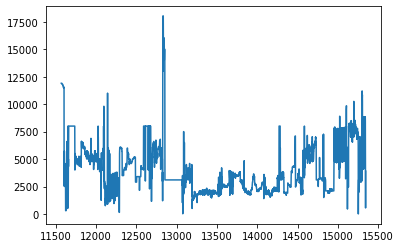

In [121]:
pyplot.plot(test_y)

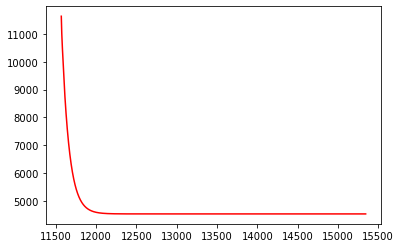

In [122]:
pyplot.plot(prediction,color='red')

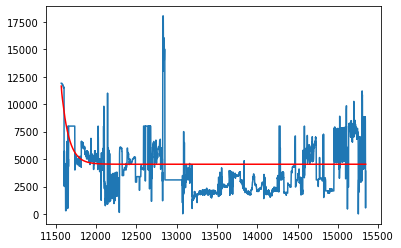

In [123]:
pyplot.plot(test_y)
pyplot.plot(prediction,color='red')

In [124]:
df_wf = df_tobacco.copy(deep=True)

In [125]:
train,test = df_wf.Modal_x0020_Price[1:df_wf.shape[0]-3777],df_wf.Modal_x0020_Price[df_wf.shape[0]-3777:]

In [126]:
data = train
predict = []
for t in test:
    model = AR(data)
    model_fit = model.fit()
    y=model_fit.predict(start=len(data),end=len(train)+len(test)-1)
    print(y.values[0])
    predict.append(y.values[0])
    data = np.append(data,t)
    data = pd.Series(data)

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


11641.56227166325
11721.257766704324
11736.516409626263
11737.287574499142
11729.48637402021
11717.756948597915
11723.470483134239
11730.634332085097
11689.503789485449
11676.668907334404
11640.888472637413
11638.080491056915
11646.698888452924
11645.501138114214
11645.327737535517
11640.976421009049
11638.63022990303
11642.720724146893
11647.434727239652
11559.58131008693
11553.448919445213
11545.912073530055
11559.233245064092
11562.541530049662
11469.545942793091
11456.203885103816
11449.89205843728
11375.855455598768
11374.655516409748
11358.670368419795
11357.99975105243
11365.262847378404
11362.211094261198
11399.205280141825
11406.716923395123
11405.883466332956
4090.984094218873
5205.167941560253
3275.394825323809
5959.348244913437
6083.849047724103
3296.9876052968543
3490.2571909089647
3251.962736200765
4201.204322463047
4916.733388290019
4834.479083942608
4220.730633857728
4538.674201537937
4122.595244046559
4319.208013120728
4330.816961874872
4002.1919712285744
3982.33857676

4787.099079854215
4204.686279243671
4514.326534007213
4557.851880624037
4578.600932456831
7346.0860326479
6792.079897370831
6861.460604402624
5553.637218468805
4821.00421401913
5006.8076438372955
5095.974207469948
5039.741512778246
5003.083187028463
5077.099665949831
4983.193195136004
5108.610133077501
4920.977318513083
4989.7785605092395
4979.950465449242
4961.3100663038385
4648.87977069373
4981.880690284234
5049.771989024004
4112.693550189169
4079.6618566172715
4838.571770379414
4089.4999514093006
5015.583923460969
4353.385771724954
4363.293312901734
4118.608403870421
4208.766702488544
4929.688062383304
4492.508265289645
4215.16588259574
3919.413990964424
4125.211306179275
4284.775392453755
4133.010242889304
4041.728088879049
3161.7198411368095
4134.649466128982
1848.102175940266
4342.503876245065
4450.65476849021
5354.100225259064
4389.832008665479
3759.2473038152707
4048.451605099296
4014.820743741963
4179.913636703937
3816.576879431752
4042.720027266385
4105.929904709514
4207.9463

5138.218004532437
5132.550591676828
5128.285512036748
5089.181832825829
5154.679815720895
5171.817863268748
5179.2983762152235
5179.8053922259505
5169.140780109835
5175.447390087693
5143.674406150779
5133.2115184437625
5131.087783209381
5146.461980958547
5141.495435457496
5140.4389784116465
5134.744229108566
3354.8465431255936
3140.7040194628994
3048.7030796750123
3102.4680720673696
3267.975625054566
3085.8762585270774
3033.174524349256
3089.914669914238
3090.2973387038087
3028.315152600949
3042.662252475139
2977.6451038748983
3024.190690782808
3000.5183124344207
3013.2629146345394
3420.547202857565
3399.580725537148
3390.443897542046
3385.5342104964952
3362.0301734152713
3418.4950479577487
3231.681519536142
3329.040421451186
3371.309833488374
3424.7663668894425
3494.9997457666072
3438.0802992336944
3388.5011036877745
3401.8728520611144
3419.0634631139314
3438.8440566427353
3404.894778335853
3435.224333937744
3431.5822115697297
3411.16404903796
3426.6296517593987
3455.294187043826
3423

3135.216423820036
3135.213050515774
3135.2096778576793
3135.2063058455637
3135.202934479267
3135.1995637586233
3135.196193683386
3135.1928242534104
3135.1894554685186
3135.186087328499
3135.1827198331475
3135.179352982353
3135.175986775871
3135.1726212135222
3135.1692562951353
3135.1658920205246
3135.1625283895087
3135.1591654018775
3135.1558030574947
3135.152441356121
3135.1490802976136
3135.145719881748
3135.142360108389
3135.139000977314
3135.135642488366
3135.1322846413354
3135.1289274360515
3135.12557087232
3135.122214949968
3135.1188596688303
3135.1155050286798
3135.112151029363
3135.1087976706986
3135.105444952475
3135.102092874536
3135.098741436676
3135.0953906387417
3135.092040480518
3135.0886909618594
3135.0853420825324
3135.081993842393
3135.078646241238
3135.0752992789044
3135.0719529552034
3135.068607269934
3135.0652622229236
3135.0619178140114
3135.058574042978
3135.0552309096747
3135.051888413891
3135.0485465554575
3135.0452053341787
3135.041864749908
3134.2560700147096


2004.6474207217495
2100.352967524983
1970.9728812182575
2022.109488647327
1981.2524793429786
2307.743351778487
2000.0707216551805
2106.39614336719
2091.5606197473276
2196.337450171633
2221.649365534803
2200.653964414683
2173.11427308523
1999.334899482081
2208.7346272428176
1939.9252698540108
1856.4974880137725
2074.0515446499917
1863.7354186028654
1919.1760082602048
1974.6874416589765
2049.0476469994433
2118.1191547178505
1911.983527726013
1896.1368652747685
1917.6904896005292
1873.5807863174148
2079.535799917812
1867.0131448045724
1923.4551306494097
2020.8573011072228
1955.0770668426564
2030.742571527424
1956.0557946758347
1917.4175191161587
1971.1379802174301
1907.625541684491
2179.5262237320662
2186.4056873921218
2045.6152800860805
2224.7449200239553
2010.7722043287263
2066.365589103039
2194.8811446824116
2069.5847804635664
1962.6133896886747
1855.994405560259
1882.3650072543176
2051.3003053053876
1894.937829493624
1882.7626018788817
1826.6249339670212
1889.7970974702737
1869.160343

3113.1451268231594
2939.317229517795
2902.2997732218305
2920.8823036381486
2940.2957090718123
2855.700238955834
2742.9467944547596
2740.21234498496
2630.3408063900392
2642.160546720414
2564.105407712655
2559.970504683048
2705.1051646393553
2761.006329097119
2640.5421736059916
2546.5186180275878
2432.689016379881
2461.1194437366353
2447.344409467858
2389.6663400091825
2417.6113694174996
2335.2979601672514
2359.3414321456607
2401.5731641071643
2368.2436859625623
2326.789505995872
2462.008157848753
2436.8897488794346
4386.64853217148
2513.529851276932
2347.739163152489
2161.009419984878
2104.417605090427
2463.619449727173
2315.41296858655
2176.5359290938404
2177.822321901501
2137.2114097741674
2019.5839016916943
2103.959640824675
2057.9711127061228
2246.979496940975
2202.6387475561196
2320.8825998041016
2355.0045752417413
2320.596409288948
2338.752416575623
2336.002130438401
2382.308561100493
2495.423351178228
2146.037056689744
2214.687787658395
2129.046029150566
2069.8391616615136
2147.0

3412.558695103989
3283.044259870988
3308.085005521127
3317.52895338491
3435.972522314385
3346.8724684510935
3307.671576562105
3254.6677694055206
3245.5001506463555
3283.045227561485
2297.1815305485734
2187.2445905759146
2248.0662551680093
2326.992322738342
7052.333070532612
7524.037311764636
7678.097657076013
7540.951704653374
7133.702941403925
7555.9408987044035
7759.8683524943835
7561.210397702314
7577.707003472007
7705.395782622585
7704.862987969389
7860.550194131195
7691.453846377563
7763.660030291107
7670.214640815229
5233.846398374406
5959.287182939142
3675.3483263479793
3555.8559513873506
3557.417702356882
3374.7472087231345
4007.5684528117167
3659.9437012609856
3415.231181281275
3269.8250834034006
3144.986113490935
3129.705098203925
3372.949716992816
3212.7077146957367
3295.0706587803597
3150.850195777617
3262.364193545386
3153.4024982698847
3102.3967522529774
3168.6893162602187
3190.304175101106
3109.9532251983455
3343.952907997315
3455.351398866416
3268.237880995653
3282.5279

5986.816207005386
6176.960630556574
5989.314174806386
5869.580624993114
5960.294484453507
5925.714412313989
6139.217319948933
6291.66072138794
6361.112419741598
6363.612625350335
6385.360291474019
6401.7691386349325
6385.121249019545
6537.953433235521
6453.410054677784
6428.475152400982
6518.633264613555
6466.18470051733
6484.412484654105
6839.4095621668375
6839.09980072571
6857.803051889016
6886.79765837784
6658.905547211554
6673.1816410118045
6279.210233781818
6422.185016678038
6470.922661583796
3845.3060623792217
3462.623583926854
3288.2123811528886
3371.005502399045
3600.2374395009256
3349.498317052132
3236.361976569263
3357.292533706014
3318.7834626454905
3278.5343240979587
3267.908858387789
3185.7330818722457
3285.709429149074
3207.8060109842904
3275.27742133598
3237.164738145036
3139.078498422797
3104.167052819601
3053.431030058305
3167.9676758532432
3156.2506847947207
2913.0276934137473
3068.3913968011566
3073.8267093082136
3177.625270087814
2825.480240897438
3223.309183760623


8014.112681099723
7949.0608116848925
7511.783237726171
7236.759331560456
6918.215206315123
7350.070395947925
7080.053857035864
7042.703241540543
7730.929223140663
8192.165030495127
7988.310773366847
8079.211810231267
7811.867353829185
8251.948659088246
8197.179013007919
7956.02971832035
8132.083845655654
7900.458329584009
8044.361187304691
7858.902235634006
7704.633844421991
7728.633149445118
7284.380124725763
7020.844259296874
6692.849755554298
6919.552141748788
7011.2528449191805
6664.623433037864
7785.370962758731
7730.138866769175
7678.268472228643
7486.633926128829
7221.427161656463
7463.434714308407
7556.039470238721
7886.264651297582
7167.5845323457
7259.870229459363
7437.565707347476
7603.876390029419
7590.226919906069
7767.857909926139
7693.731797426349
7039.402727692312
9513.682138707385
7385.708287127989
7322.294801765568
7186.7964752872895
7279.514204449622
7570.294715609415
7534.597008498339
7518.894649107463
7787.163913582431
8216.8451498569
8120.1784071244
8296.513308272

In [127]:
mse = mean_squared_error(test.values,predict)
mse

740244.4643839109

In [128]:
mape = mean_absolute_percentage_error(test_y,predict)
mape

49.287490795252296

In [129]:
print("Model Accuracy: {:f} %".format((100-mape)))

Model Accuracy: 50.712509 %


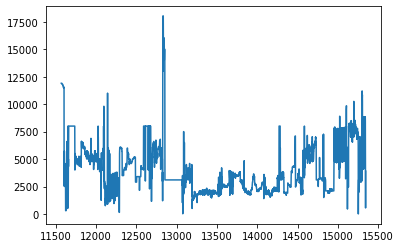

In [130]:
pyplot.plot(test_y)

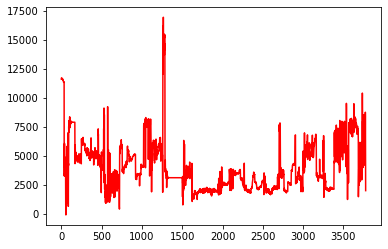

In [131]:
pyplot.plot(predict,color='red')

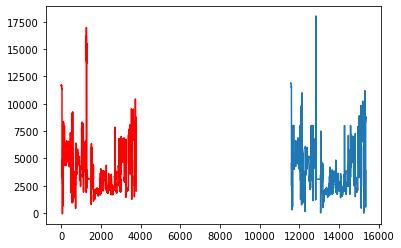

In [132]:
pyplot.plot(test_y)
pyplot.plot(predict,color='red')

In [133]:
df_mv = df_tobacco.copy(deep=True)

In [134]:
df_mv["lag1"] = df_mv["Modal_x0020_Price"].shift(1) 

In [135]:
df_mv["Resid"] = df_mv["Modal_x0020_Price"] - df_mv["lag1"]

In [136]:
df_mv

,Arrival_Date,State,Variety,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price,lag1,Resid
0,2010-05-19,Andhra Pradesh,Other,180,220,200.0,NaN,NaN
1,2010-05-20,Andhra Pradesh,Other,180,220,200.0,200.0,0.0
2,2010-08-19,Chattisgarh,Other,1500,1500,1500.0,200.0,1300.0
3,2010-10-11,Chattisgarh,Other,2400,2400,2400.0,1500.0,900.0
4,2010-12-22,Chattisgarh,Other,2400,2400,2400.0,2400.0,0.0
...,...,...,...,...,...,...,...,...
15339,2021-05-28,Uttar Pradesh,Chewing,8350,8600,8450.0,8850.0,-400.0
15340,2021-04-06,Uttar Pradesh,Chewing,4100,4300,4200.0,8450.0,-4250.0
15341,2021-11-06,Uttar Pradesh,Chewing,4000,4200,4100.0,4200.0,-100.0
15342,2021-08-04,West Bengal,Other,500,600,550.0,4100.0,-3550.0


In [137]:
train,test = df_mv.Resid[1:df_mv.shape[0]-3777],df_mv.Resid[df_mv.shape[0]-3777:]

In [138]:
train.head()

1       0.0
2    1300.0
3     900.0
4       0.0
5    -430.0
Name: Resid, dtype: float64

In [139]:
test.head()

11567    100.0
11568      0.0
11569      0.0
11570      0.0
11571      0.0
Name: Resid, dtype: float64

In [140]:
model = AR(train)
model_fit = model.fit() 

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


In [141]:
model_fit.k_ar

39

In [142]:
model_fit.params

const        1.784843
L1.Resid    -0.182891
L2.Resid    -0.104763
L3.Resid    -0.058411
L4.Resid    -0.092063
L5.Resid    -0.169000
L6.Resid    -0.081621
L7.Resid    -0.054819
L8.Resid    -0.079651
L9.Resid    -0.084159
L10.Resid   -0.048197
L11.Resid   -0.062679
L12.Resid   -0.032998
L13.Resid   -0.051011
L14.Resid   -0.042575
L15.Resid   -0.045990
L16.Resid   -0.051022
L17.Resid   -0.024772
L18.Resid   -0.007286
L19.Resid   -0.007629
L20.Resid   -0.016540
L21.Resid   -0.026815
L22.Resid    0.068082
L23.Resid    0.015752
L24.Resid   -0.001703
L25.Resid   -0.017324
L26.Resid   -0.056469
L27.Resid   -0.018617
L28.Resid   -0.001063
L29.Resid   -0.000703
L30.Resid   -0.017421
L31.Resid   -0.027206
L32.Resid   -0.002453
L33.Resid   -0.009940
L34.Resid   -0.008244
L35.Resid   -0.000006
L36.Resid   -0.007938
L37.Resid   -0.005477
L38.Resid    0.003366
L39.Resid   -0.005277
dtype: float64

In [143]:
pred_resid = model_fit.predict(start=len(train),end=len(train)+len(test)-1)

In [144]:
pred_resid

11567     7.310641
11568     4.216751
11569    11.900285
11570     6.411011
11571     1.577547
           ...    
15339     0.738291
15340     0.738291
15341     0.738291
15342     0.738291
15343     0.738291
Length: 3777, dtype: float64

In [145]:
df_mv.lag1[df_mv.shape[0]-3777:]

11567    11800.0
11568    11900.0
11569    11900.0
11570    11900.0
11571    11900.0
          ...   
15339     8850.0
15340     8450.0
15341     4200.0
15342     4100.0
15343      550.0
Name: lag1, Length: 3777, dtype: float64

In [146]:
prediction = df_mv.lag1[df_mv.shape[0]-3777:] + pred_resid

In [147]:
   prediction 

11567    11807.310641
11568    11904.216751
11569    11911.900285
11570    11906.411011
11571    11901.577547
             ...     
15339     8850.738291
15340     8450.738291
15341     4200.738291
15342     4100.738291
15343      550.738291
Length: 3777, dtype: float64

In [148]:
mse = mean_squared_error(test_y,prediction)
mse

819788.5542288814

In [149]:
mape = mean_absolute_percentage_error(test_y,prediction)
mape

47.330290830480386

In [150]:
print("Model Accuracy: {:f} %".format((100-mape)))

Model Accuracy: 52.669709 %


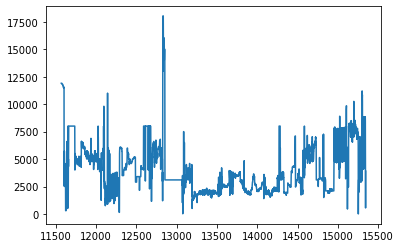

In [151]:
pyplot.plot(test_y)

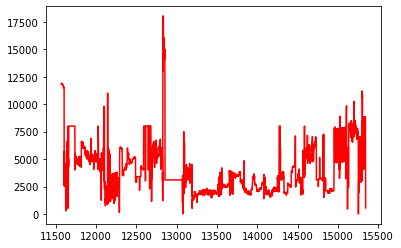

In [152]:
pyplot.plot(prediction,color='red')

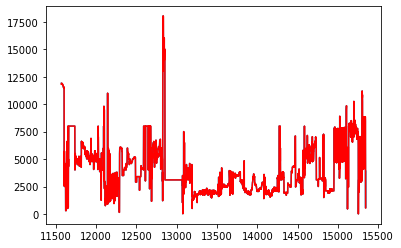

In [153]:
pyplot.plot(test_y)
pyplot.plot(prediction,color='red')